In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv('/Users/Uyen/Documents/Oswego courses/BHI 699/Dataset/tb-bio.csv')
df.head()

,ICD9_CODE,TITLE,SUBJECT_ID,GENDER,ICUSTAY_ID,DAYS_IN_ICU,HOSPITAL_DEATH,SPECIMEN_EXAMINED,SPECIMEN_RESULT,LANGUAGE,...,MARITAL_STATUS,ETHNICITY,INSURANCE,ICU_DATE,BIRTH_DATE,DEATH_DATE,AGE,EXPIRE_FLAG,DISEASE_TYPE,BACTERIA_GROUP
0,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,17.3345,8/30/47,BLOOD CULTURE,NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,69,1,Extrapulmonary TB,Unknown Group of Bateria
1,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,17.3345,8/30/47,Blood (EBV),NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,69,1,Extrapulmonary TB,Unknown Group of Bateria
2,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,17.3345,8/30/47,BLOOD CULTURE ( MYCO/F LYTIC BOTTLE),NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,69,1,Extrapulmonary TB,Unknown Group of Bateria
3,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,17.3345,8/30/47,URINE,NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,69,1,Extrapulmonary TB,Unknown Group of Bateria
4,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,17.3345,8/30/47,SPUTUM,NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,69,1,Extrapulmonary TB,Unknown Group of Bateria


In [230]:
# Normalize numerical columns
cols_to_norm = ['AGE','DAYS_IN_ICU']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,ICD9_CODE,TITLE,SUBJECT_ID,GENDER,ICUSTAY_ID,DAYS_IN_ICU,HOSPITAL_DEATH,SPECIMEN_EXAMINED,SPECIMEN_RESULT,LANGUAGE,...,MARITAL_STATUS,ETHNICITY,INSURANCE,ICU_DATE,BIRTH_DATE,DEATH_DATE,AGE,EXPIRE_FLAG,DISEASE_TYPE,BACTERIA_GROUP
0,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,0.321448,8/30/47,BLOOD CULTURE,NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,0.710145,1,Extrapulmonary TB,Unknown Group of Bateria
1,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,0.321448,8/30/47,Blood (EBV),NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,0.710145,1,Extrapulmonary TB,Unknown Group of Bateria
2,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,0.321448,8/30/47,BLOOD CULTURE ( MYCO/F LYTIC BOTTLE),NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,0.710145,1,Extrapulmonary TB,Unknown Group of Bateria
3,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,0.321448,8/30/47,URINE,NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,0.710145,1,Extrapulmonary TB,Unknown Group of Bateria
4,1085,"Other primary progressive tuberculosis, tuberc...",15716,F,225094,0.321448,8/30/47,SPUTUM,NONE,ENGL,...,SINGLE,BLACK/AFRICAN AMERICAN,Medicare,5/30/47,11/4/77,8/30/47,0.710145,1,Extrapulmonary TB,Unknown Group of Bateria


In [231]:
# Apply the label encoding for categorical columns
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    df[c1]= label_encoder.fit_transform(df[c1])
    df[c1].unique()

In [232]:
LABEL_ENCODING("ICD9_CODE")
LABEL_ENCODING("TITLE")
LABEL_ENCODING("GENDER")
LABEL_ENCODING("LANGUAGE")
LABEL_ENCODING("RELIGION")
LABEL_ENCODING("MARITAL_STATUS")
LABEL_ENCODING("ETHNICITY")
LABEL_ENCODING("SPECIMEN_EXAMINED")
LABEL_ENCODING("SPECIMEN_RESULT")
LABEL_ENCODING("INSURANCE")
LABEL_ENCODING("DISEASE_TYPE")
LABEL_ENCODING("BACTERIA_GROUP")
df

,ICD9_CODE,TITLE,SUBJECT_ID,GENDER,ICUSTAY_ID,DAYS_IN_ICU,HOSPITAL_DEATH,SPECIMEN_EXAMINED,SPECIMEN_RESULT,LANGUAGE,...,MARITAL_STATUS,ETHNICITY,INSURANCE,ICU_DATE,BIRTH_DATE,DEATH_DATE,AGE,EXPIRE_FLAG,DISEASE_TYPE,BACTERIA_GROUP
0,0,9,15716,0,225094,0.321448,8/30/47,4,46,6,...,3,4,2,5/30/47,11/4/77,8/30/47,0.710145,1,0,2
1,0,9,15716,0,225094,0.321448,8/30/47,12,46,6,...,3,4,2,5/30/47,11/4/77,8/30/47,0.710145,1,0,2
2,0,9,15716,0,225094,0.321448,8/30/47,5,46,6,...,3,4,2,5/30/47,11/4/77,8/30/47,0.710145,1,0,2
3,0,9,15716,0,225094,0.321448,8/30/47,42,46,6,...,3,4,2,5/30/47,11/4/77,8/30/47,0.710145,1,0,2
4,0,9,15716,0,225094,0.321448,8/30/47,34,46,6,...,3,4,2,5/30/47,11/4/77,8/30/47,0.710145,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,31,17,7241,1,299972,0.083868,NaN,17,46,6,...,3,4,3,5/12/74,9/13/39,NaN,0.202899,0,1,2
5883,31,17,7241,1,299972,0.083868,NaN,4,46,6,...,3,4,3,5/12/74,9/13/39,NaN,0.202899,0,1,2
5884,31,17,7241,1,299972,0.083868,NaN,32,46,6,...,3,4,3,5/12/74,9/13/39,NaN,0.202899,0,1,2
5885,31,17,7241,1,299972,0.083868,NaN,42,46,6,...,3,4,3,5/12/74,9/13/39,NaN,0.202899,0,1,2


In [233]:
# split into inputs and outputs
x = df.drop(['ICD9_CODE','TITLE','SUBJECT_ID','ICUSTAY_ID','HOSPITAL_DEATH','SPECIMEN_RESULT',
               'BIRTH_DATE','DEATH_DATE','EXPIRE_FLAG','ICU_DATE'],axis=1)
y = df['EXPIRE_FLAG']

In [234]:
print(x)

      GENDER  DAYS_IN_ICU  SPECIMEN_EXAMINED  LANGUAGE  RELIGION  \
0          0     0.321448                  4         6         8   
1          0     0.321448                 12         6         8   
2          0     0.321448                  5         6         8   
3          0     0.321448                 42         6         8   
4          0     0.321448                 34         6         8   
...      ...          ...                ...       ...       ...   
5882       1     0.083868                 17         6         9   
5883       1     0.083868                  4         6         9   
5884       1     0.083868                 32         6         9   
5885       1     0.083868                 42         6         9   
5886       1     0.083868                 27         6         9   

      MARITAL_STATUS  ETHNICITY  INSURANCE       AGE  DISEASE_TYPE  \
0                  3          4          2  0.710145             0   
1                  3          4          2 

In [235]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
5882    0
5883    0
5884    0
5885    0
5886    0
Name: EXPIRE_FLAG, Length: 5887, dtype: int64


In [236]:
print(x.shape)
print(y.shape)

(5887, 11)
(5887,)


In [237]:
#Logistic Regression in Python: Handwriting Recognition
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [238]:
# split data into train and test set in 70:30 ratio
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.3, random_state=0)

In [202]:
# We are transforming data to numpy array to implementing with keras
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Artificial Neural Network (ANN)

In [239]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# build a model
model = Sequential()

#Adding First Hidden Layer
model.add(Dense(16, input_shape=(x.shape[1],), activation='relu'))

#Adding Second Hidden Layer
model.add(Dense(16, activation='relu'))

#Adding Output Layer
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 16)                192       
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [240]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
330/330 [==============================] - 1s 951us/step - loss: 0.6127 - accuracy: 0.6723 - val_loss: 0.5613 - val_accuracy: 0.7172
Epoch 2/80
330/330 [==============================] - 0s 827us/step - loss: 0.5654 - accuracy: 0.7233 - val_loss: 0.5339 - val_accuracy: 0.7269
Epoch 3/80
330/330 [==============================] - 0s 808us/step - loss: 0.5320 - accuracy: 0.7542 - val_loss: 0.5006 - val_accuracy: 0.7973
Epoch 4/80
330/330 [==============================] - 0s 846us/step - loss: 0.5026 - accuracy: 0.7816 - val_loss: 0.4803 - val_accuracy: 0.8022
Epoch 5/80
330/330 [==============================] - 0s 861us/step - loss: 0.4828 - accuracy: 0.7961 - val_loss: 0.4604 - val_accuracy: 0.8216
Epoch 6/80
330/330 [==============================] - 0s 825us/step - loss: 0.4634 - accuracy: 0.8076 - val_loss: 0.4481 - val_accuracy: 0.7949
Epoch 7/80
330/330 [==============================] - 0s 810us/step - loss: 0.4459 - accuracy: 0.8158 - val_loss: 0.4373 - val_accuracy:

In [241]:
score = model.evaluate(x_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

56/56 [==============================] - 0s 685us/step - loss: 0.2652 - accuracy: 0.9032
Test Accuracy: 90.32%
Test Loss: 0.2651689648628235


In [242]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state = 42)
x_smote, y_smote = sm.fit_resample(x_train, y_train)
x_smote = pd.DataFrame(x_smote)
y_smote = pd.DataFrame(y_smote)
y_smote.iloc[:,0].value_counts()

0    2717
1    2717
Name: EXPIRE_FLAG, dtype: int64

In [243]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_smote,
                    y_smote,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
435/435 [==============================] - 1s 918us/step - loss: 0.1980 - accuracy: 0.9252 - val_loss: 0.2891 - val_accuracy: 0.8988
Epoch 2/80
435/435 [==============================] - 0s 891us/step - loss: 0.1954 - accuracy: 0.9245 - val_loss: 0.2088 - val_accuracy: 0.9172
Epoch 3/80
435/435 [==============================] - 0s 791us/step - loss: 0.1920 - accuracy: 0.9282 - val_loss: 0.2528 - val_accuracy: 0.9126
Epoch 4/80
435/435 [==============================] - 0s 756us/step - loss: 0.1932 - accuracy: 0.9248 - val_loss: 0.2426 - val_accuracy: 0.8997
Epoch 5/80
435/435 [==============================] - 0s 826us/step - loss: 0.1886 - accuracy: 0.9296 - val_loss: 0.2479 - val_accuracy: 0.9006
Epoch 6/80
435/435 [==============================] - 0s 839us/step - loss: 0.1950 - accuracy: 0.9255 - val_loss: 0.2408 - val_accuracy: 0.9052
Epoch 7/80
435/435 [==============================] - 0s 867us/step - loss: 0.1869 - accuracy: 0.9331 - val_loss: 0.2078 - val_accuracy:

In [244]:
score = model.evaluate(x_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

56/56 [==============================] - 0s 644us/step - loss: 0.2332 - accuracy: 0.9100
Test Accuracy: 91.00%
Test Loss: 0.23321481049060822


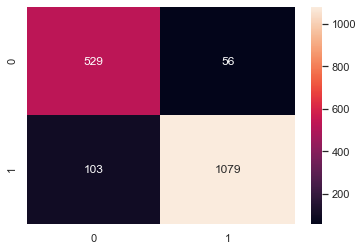

In [245]:
predictions = model.predict(x_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, predictions.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [246]:
print(confusion_matrix(y_test, predictions.round()))
print(classification_report(y_test, predictions.round()))

[[ 529   56]
 [ 103 1079]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       585
           1       0.95      0.91      0.93      1182

    accuracy                           0.91      1767
   macro avg       0.89      0.91      0.90      1767
weighted avg       0.91      0.91      0.91      1767



In [247]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions.round()), \
             columns=['Predicted Survival', "Predicted Death"], index=['Acutual Survival', 'Actual Death'])

,Predicted Survival,Predicted Death
Acutual Survival,529,56
Actual Death,103,1079


In [248]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions.round()).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 1079
False Positives: 56
True Negatives: 529
False Negatives: 103


In [249]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,predictions.round())

0.9085665321705931

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

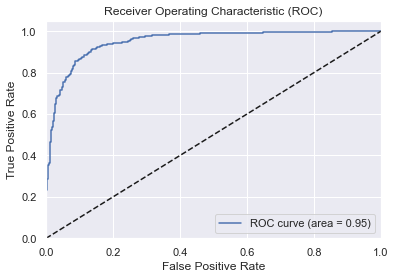

In [215]:
pred = model.predict(x_test)
plot_roc(pred,y_test)

In [33]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [75]:
# build a model
model = Sequential()

#Adding First Hidden Layer
model.add(Dense(16, input_shape=(x.shape[1],), activation='relu'))

#Adding Second Hidden Layer
model.add(Dense(16, activation='relu'))

#Adding Output Layer
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

# Fitting ANN
history = model.fit(x_train,
                    y_train,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 16)                192       
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
330/330 [==============================] - 1s 1ms/step - loss: 0.6212 - accuracy: 0.6532 - val_loss: 0.4716 - val_accuracy: 0.7864
Epoch 2/80
330/330 [==============================] - 0s 769us/step - loss: 0.4134 - accuracy: 0.8219 - val_loss: 0.3672 - val_accuracy: 0.8374
Epoch 3/80
330/330 [==============

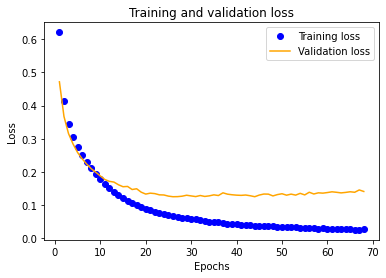

In [76]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

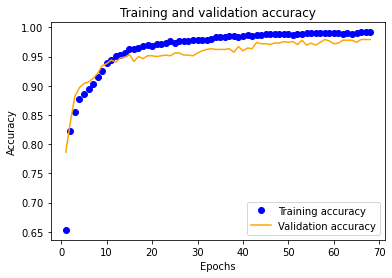

0.9793689250946045

In [77]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# see how these are numbers between 0 and 1? 
model.predict(x_test) # prob of successes (survival)
np.round(model.predict(x_test),0) # 1 and 0 (survival or not)
y_test # 1 and 0 (survival or not)

# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(x_test),0)

# confusion matrix
print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)

## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])

print(classification_report(y_test, preds))

[[ 572   13]
 [  12 1170]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       585
           1       0.99      0.99      0.99      1182

    accuracy                           0.99      1767
   macro avg       0.98      0.98      0.98      1767
weighted avg       0.99      0.99      0.99      1767



In [23]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_test, preds), \
             columns=['Predicted Survival', "Predicted Death"], index=['Acutual Survival', 'Actual Death'])

NameError: name 'preds' is not defined

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
# Classification neural network
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu',
                kernel_initializer='random_normal'))
model.add(Dense(50,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(25,activation='relu',kernel_initializer='random_normal'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics =['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
    patience=5, verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
138/138 - 0s - loss: 0.6106 - accuracy: 0.6777 - val_loss: 0.5563 - val_accuracy: 0.7133 - 473ms/epoch - 3ms/step
Epoch 2/1000
138/138 - 0s - loss: 0.5207 - accuracy: 0.7676 - val_loss: 0.4691 - val_accuracy: 0.8057 - 125ms/epoch - 902us/step
Epoch 3/1000
138/138 - 0s - loss: 0.4399 - accuracy: 0.8140 - val_loss: 0.4066 - val_accuracy: 0.8261 - 132ms/epoch - 955us/step
Epoch 4/1000
138/138 - 0s - loss: 0.3936 - accuracy: 0.8308 - val_loss: 0.3639 - val_accuracy: 0.8336 - 122ms/epoch - 886us/step
Epoch 5/1000
138/138 - 0s - loss: 0.3331 - accuracy: 0.8614 - val_loss: 0.2977 - val_accuracy: 0.8818 - 124ms/epoch - 900us/step
Epoch 6/1000
138/138 - 0s - loss: 0.2919 - accuracy: 0.8768 - val_loss: 0.2714 - val_accuracy: 0.8974 - 143ms/epoch - 1ms/step
Epoch 7/1000
138/138 - 0s - loss: 0.2741 - accuracy: 0.8870 - val_loss: 0.2634 - val_accuracy: 0.8893 - 148ms/epoch - 1ms/step
Epoch 8/1000
138/138 - 0s - loss: 0.2649 - accuracy: 0.8947 - val_loss: 0.2532 - val_accuracy: 0.9001 -

In [23]:
pred = model.predict(x_test)
plot_roc(pred,y_test)

NameError: name 'plot_roc' is not defined

In [50]:
#Importing the Classifier for training and making predictions
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,50,50,50), activation ='logistic', max_iter=3000)
classifier.fit(x_train, y_train.values.ravel())
y_pred = classifier.predict(x_test)

In [51]:
confusion_matrix(y_test, y_pred)

array([[ 562,   23],
       [  17, 1165]])

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       585
           1       0.98      0.99      0.98      1182

    accuracy                           0.98      1767
   macro avg       0.98      0.97      0.97      1767
weighted avg       0.98      0.98      0.98      1767



In [53]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred), \
             columns=['Predicted Survival', "Predicted Death"], index=['Acutual Survival', 'Actual Death'])

,Predicted Survival,Predicted Death
Acutual Survival,562,23
Actual Death,17,1165


In [81]:
def get_feature_importance(j, n):
    s = accuracy_score(y_test, y_pred) # baseline score
    total = 0.0
    for i in range(n):
        perm = np.random.permutation(range(x_test.shape[0]))
        x_test_ = x_test.copy()
        x_test_[:, j] = x_test[perm, j]
        y_pred_ = classifier.predict(x_test_)
        s_ij = accuracy_score(y_test, y_pred_)
        total += s_ij
    return s - total / n

In [82]:
x_train = df.drop(['ICD9_CODE','TITLE','SUBJECT_ID','ICUSTAY_ID','HOSPITAL_DEATH','SPECIMEN_RESULT',
               'BIRTH_DATE','DEATH_DATE','EXPIRE_FLAG','ICU_DATE'],axis=1)

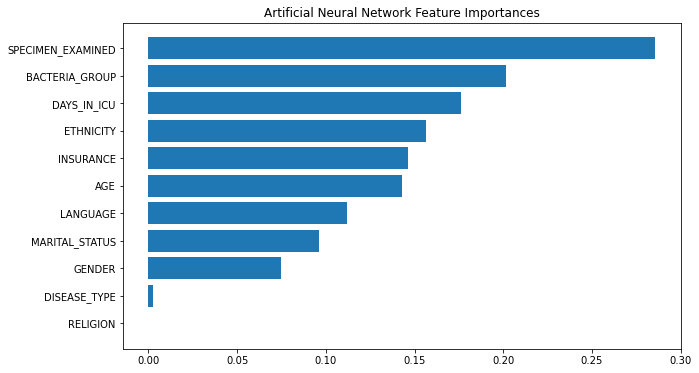

In [83]:
# Feature importances
f = []
for j in range(x_test.shape[1]):
    f_j = get_feature_importance(j, 100)
    f.append(f_j)

sorted_indices = np.argsort(f)[::-1]

f.sort()

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(x_test.shape[1]), f)
#plt.yticks(ticks=range(x_test.shape[1]))
plt.yticks(range(x_test.shape[1]), x_train.columns[sorted_indices], rotation=360)
plt.title("Artificial Neural Network Feature Importances")
plt.savefig('ANN.png', bbox_inches='tight')
plt.show()

In [85]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def base_model(): 
    # build a model
    model = Sequential()

    #Adding First Hidden Layer
    model.add(Dense(16, input_shape=(x.shape[1],), activation='relu'))

    #Adding Second Hidden Layer
    model.add(Dense(16, activation='relu'))

    #Adding Output Layer
    model.add(Dense(1, activation='sigmoid'))


    # compile the model
    model.compile(optimizer='Adam', 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # early stopping callback
    # This callback will stop the training when there is no improvement in  
    # the validation loss for 10 consecutive epochs.  
    es = EarlyStopping(monitor='val_accuracy', 
                                       mode='max', # don't minimize the accuracy!
                                       patience=10,
                                       restore_best_weights=True)
    return model

# split into inputs and outputs
x = df.drop(['ICD9_CODE','TITLE','SUBJECT_ID','ICUSTAY_ID','HOSPITAL_DEATH','SPECIMEN_RESULT',
               'BIRTH_DATE','DEATH_DATE','EXPIRE_FLAG','ICU_DATE'],axis=1)
y = df['EXPIRE_FLAG']

my_model = KerasClassifier(base_model)  
my_model.fit(x,y)

perm = PermutationImportance(my_model, random_state=1).fit(x,y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

<ipython-input-85-92b41842cf39>:38: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  my_model = KerasClassifier(base_model)


184/184 [==============================] - 0s 491us/step - loss: 0.5836 - accuracy: 0.7556


Weight,Feature
0.1105 ± 0.0081,ETHNICITY
0.0804 ± 0.0085,RELIGION
0.0436 ± 0.0032,INSURANCE
0.0382 ± 0.0088,LANGUAGE
0.0222 ± 0.0030,MARITAL_STATUS
0.0151 ± 0.0027,GENDER
0.0097 ± 0.0034,DISEASE_TYPE
0.0055 ± 0.0071,SPECIMEN_EXAMINED
0.0009 ± 0.0009,DAYS_IN_ICU
0.0003 ± 0.0009,AGE


In [250]:
from sklearn.metrics import roc_curve
y_pred_ann = model.predict(x_test).ravel()
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_pred_ann)

In [251]:
from sklearn.metrics import auc
auc_ann = auc(fpr_ann, tpr_ann)

# Long Short-Term Memory (LSTM)

In [252]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)
from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state = 42)
x_smote1, y_smote1 = sm.fit_resample(x_train, y_train)

lstm = Sequential()
lstm.add(LSTM(100, activation='relu', input_shape= (x.shape[1], 1), return_sequences=False))
lstm.add(Dropout(0.5))
lstm.add(Dense(units=50, activation='relu'))
lstm.add(Dense(units=1, activation='sigmoid'))
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.summary()
hist = lstm.fit(x_smote1, y_smote1, validation_data = (x_test, y_test), epochs = 50, batch_size = 32)

score = lstm.evaluate(x_test, y_test)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(score[1]*100,score[0]))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dense_29 (Dense)            (None, 1)                 51        
                                                                 
Total params: 45,901
Trainable params: 45,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
170/170 [==============================] - 2s 6ms/step - loss: 0.6892 - accuracy: 0.5407 - val_loss: 0.7054 - val_accuracy: 0.4290
Epoch 2/50
170/170 [===================

In [ ]:
# import
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# build model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape= (x.shape[1], 1), return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

model.fit(x_smotek, y_smotek, validation_data = (x_test, y_test), epochs = 50, batch_size = 32)



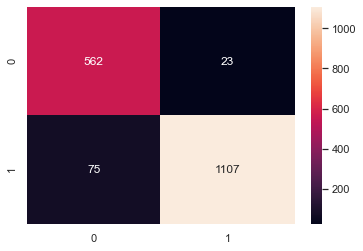

In [253]:
predictions1 = lstm.predict(x_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, predictions1.round())
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [254]:
print(confusion_matrix(y_test, predictions1.round()))
print(classification_report(y_test, predictions1.round()))

[[ 562   23]
 [  75 1107]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       585
           1       0.98      0.94      0.96      1182

    accuracy                           0.94      1767
   macro avg       0.93      0.95      0.94      1767
weighted avg       0.95      0.94      0.95      1767



In [255]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions1.round()), \
             columns=['Predicted Survival', "Predicted Death"], index=['Acutual Survival', 'Actual Death'])

,Predicted Survival,Predicted Death
Acutual Survival,562,23
Actual Death,75,1107


In [256]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,predictions1.round())

0.9486159920170072

[]

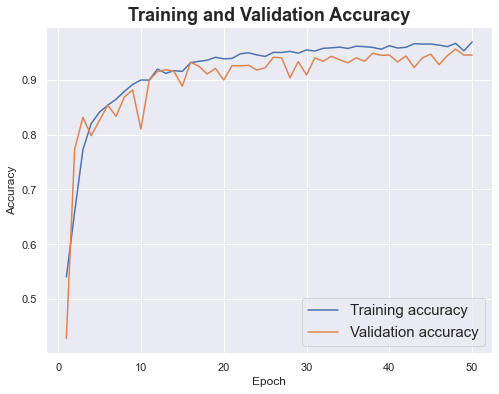

In [257]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8,6))
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, '-', label='Validation accuracy')
plt.title('Training and Validation Accuracy', fontweight='bold', fontsize=18)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(prop={'size':15}, loc='lower right')

plt.savefig('acc.png', bbox_inches='tight')
plt.plot()

[]

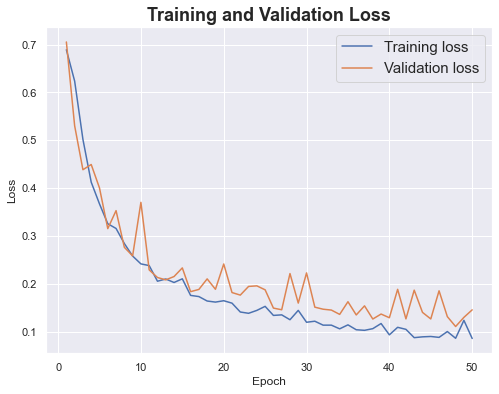

In [258]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
acc = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.figure(figsize=(8,6))
plt.plot(epochs, acc, '-', label='Training loss')
plt.plot(epochs, val, '-', label='Validation loss')
plt.title('Training and Validation Loss', fontweight='bold', fontsize=18)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(prop={'size':15}, loc='upper right')

plt.savefig('loss.png', bbox_inches='tight')
plt.plot()

In [259]:
from sklearn.metrics import roc_curve
y_pred_keras = lstm.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

# Logistic Regression

In [263]:
# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr = LogisticRegression(max_iter=3000)
lr.fit(x_train_res, y_train_res.values.ravel())
predictions = lr.predict(x_test)

y_pred_lr = lr.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

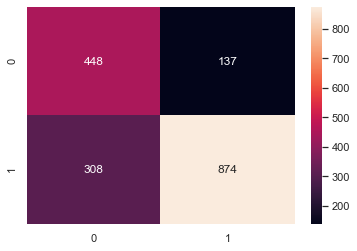

In [264]:
predictions2 = lr.predict(x_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, predictions2)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [265]:
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, predictions2))

[[448 137]
 [308 874]]
              precision    recall  f1-score   support

           0       0.59      0.77      0.67       585
           1       0.86      0.74      0.80      1182

    accuracy                           0.75      1767
   macro avg       0.73      0.75      0.73      1767
weighted avg       0.77      0.75      0.75      1767



In [266]:
from sklearn.metrics import classification_report, confusion_matrix
pd.DataFrame(confusion_matrix(y_test, predictions2), \
             columns=['Predicted Survival', "Predicted Death"], index=['Acutual Survival', 'Actual Death'])

,Predicted Survival,Predicted Death
Acutual Survival,448,137
Actual Death,308,874


# Random Forest

In [267]:
# SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rf.fit(x_train_res, y_train_res.values.ravel())
predictions = rf.predict(x_test)

y_pred_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

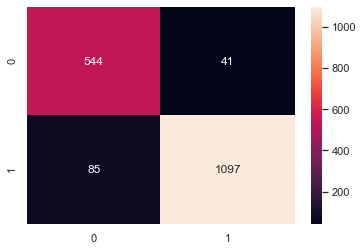

In [268]:
predictions3 = rf.predict(x_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, predictions3)
sns.heatmap(cm, annot=True, fmt='.0f')
plt.show()

In [269]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,predictions3)

0.9290012581890754

In [270]:
print(confusion_matrix(y_test, predictions3))
print(classification_report(y_test, predictions3))

[[ 544   41]
 [  85 1097]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       585
           1       0.96      0.93      0.95      1182

    accuracy                           0.93      1767
   macro avg       0.91      0.93      0.92      1767
weighted avg       0.93      0.93      0.93      1767



# AUC-ROC Curve

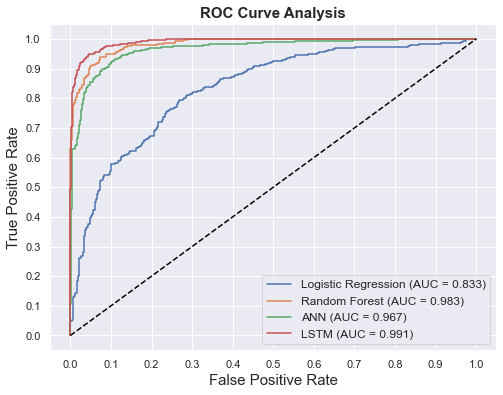

In [271]:
fig = plt.figure(figsize=(8,6))
#plt.figure(1)
#plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.3f})'.format(auc_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.3f})'.format(auc_rf))
plt.plot(fpr_ann, tpr_ann, label='ANN (AUC = {:.3f})'.format(auc_ann))
plt.plot(fpr_keras, tpr_keras, label='LSTM (AUC = {:.3f})'.format(auc_keras))

#plt.xlabel('False positive rate')
#plt.ylabel('True positive rate')
#plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
#plt.legend(loc='best')

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.savefig('ROC.png', bbox_inches='tight')
plt.show()

In [ ]:
#Logistic Regression in Python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# split data into train and test set in 70:30 ratio
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# fit the model using the training data
model = LogisticRegression
model.fit(x_train, y_train)

In [ ]:
# make predictions on the testing set
y_pred = model.predict(x_test)

In [ ]:
# evaluate predictions
model.score(x_test, y_test)